In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from loadTDMS import *
from tqdm import tqdm
import seaborn as sns

In [5]:
date = 20220630
num = 10
num_list = [10,50,100,150,160]
path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
# path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Non-Cutting\Dynamo_{num}.tdms"


# path = rf"Z:\100 Raw_data\20211115---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
# path = rf"Z:\100 Raw_data\20211115---切削実験\Dynamometer\Non-Cutting\Dynamo_{num}.tdms"


c_d = load_tdms(path, ch_num=3)
len(c_d[1])

5022740

In [10]:
%matplotlib qt
plt.plot(c_d[1][:4670000])

(array([   3433.,   64955.,  360809.,  480538.,  249000.,  246773.,
        1076642., 2168386.,  363209.,    8995.]),
 array([3.4956532, 3.5871015, 3.6785495, 3.7699978, 3.861446 , 3.9528942,
        4.0443425, 4.135791 , 4.2272387, 4.318687 , 4.4101353],
       dtype=float32),
 <a list of 10 Patch objects>)

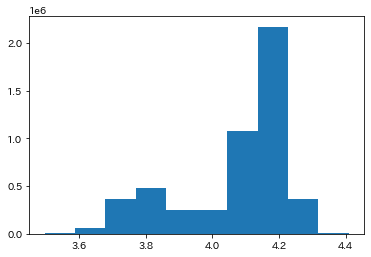

In [6]:
plt.hist(c_d[1])

 12%|█▏        | 20/168 [00:25<02:40,  1.09s/it]<ipython-input-117-1ebedab15114>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure, ax = plt.subplots()
100%|██████████| 168/168 [03:47<00:00,  1.36s/it]


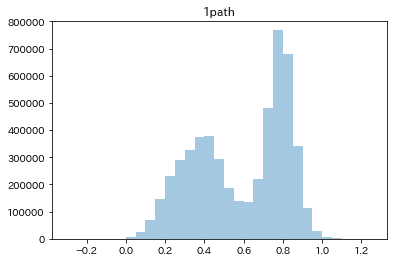

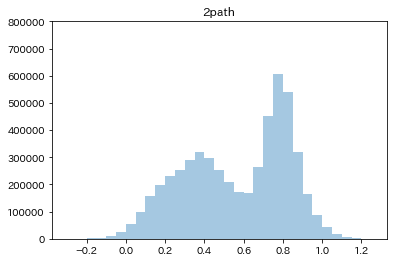

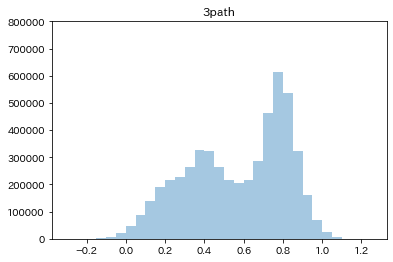

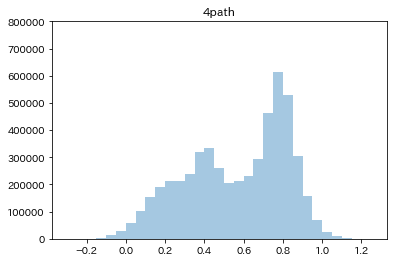

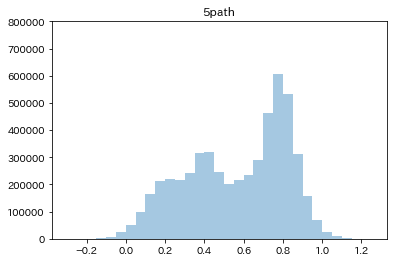

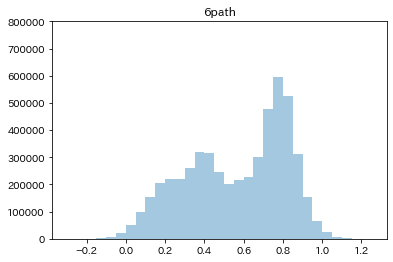

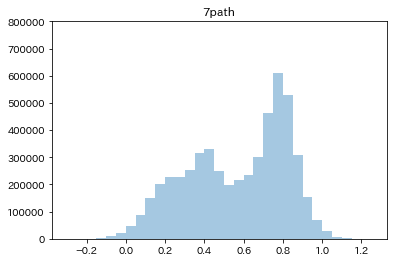

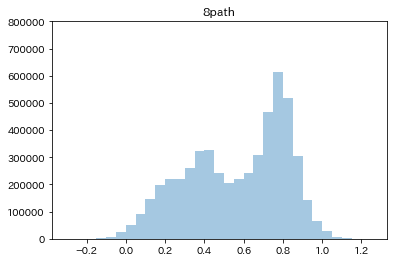

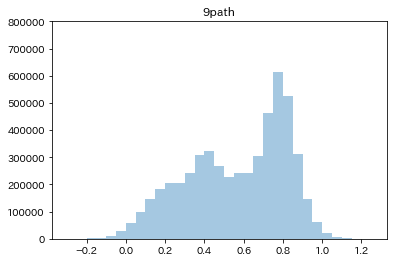

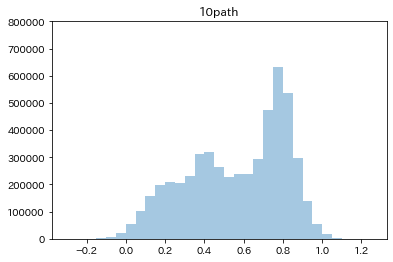

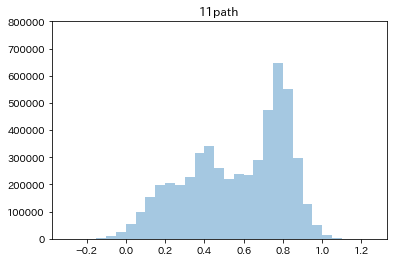

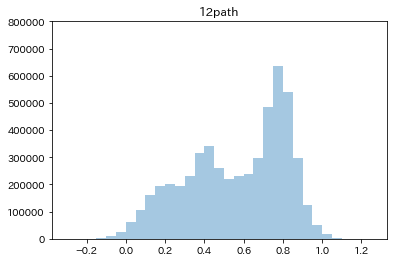

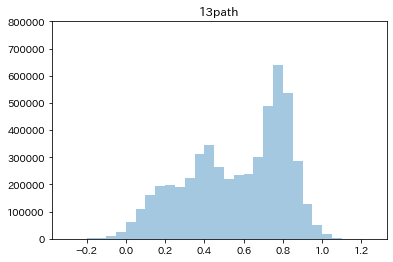

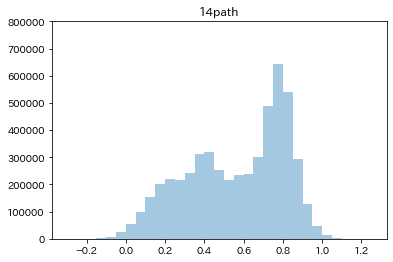

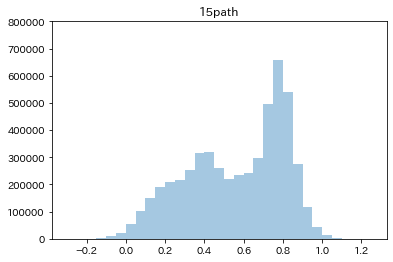

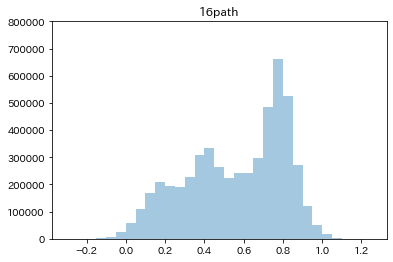

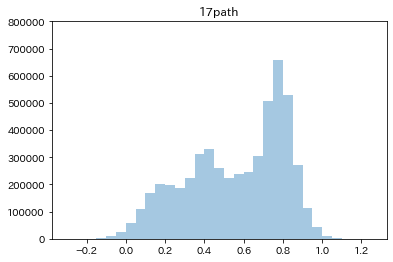

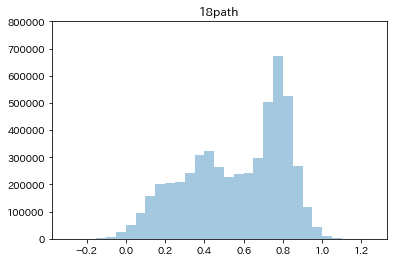

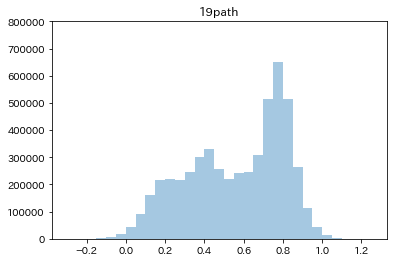

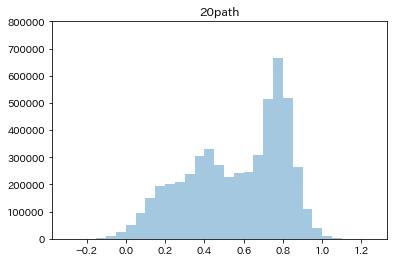

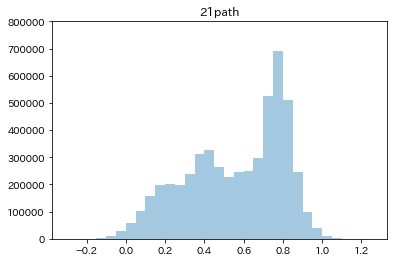

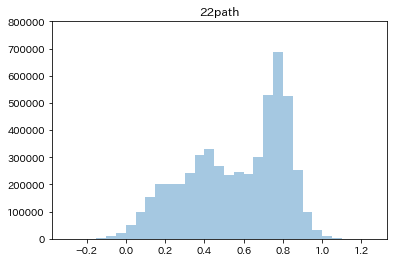

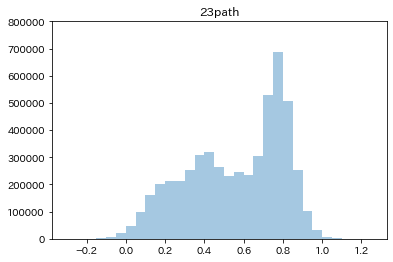

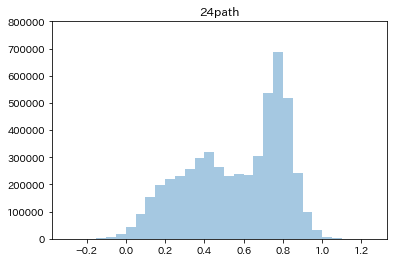

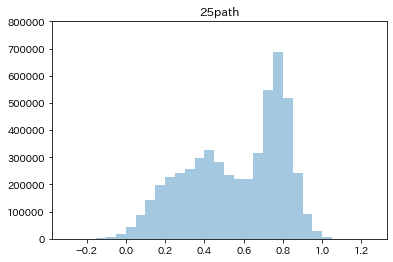

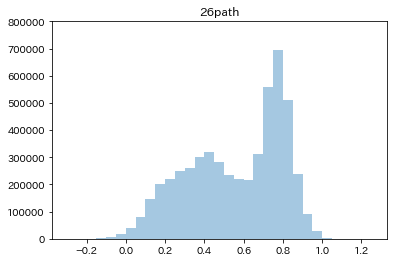

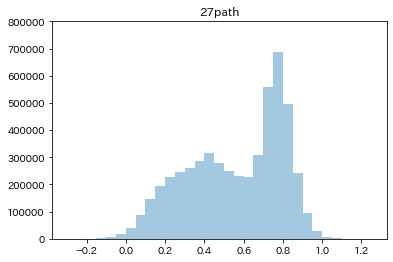

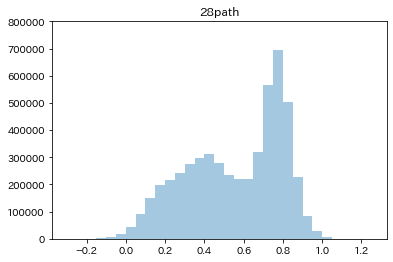

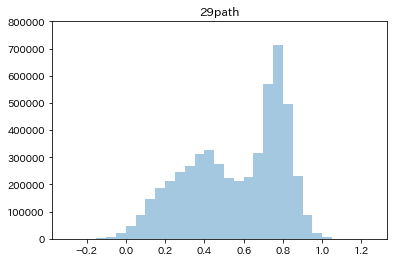

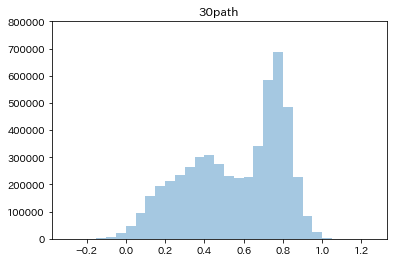

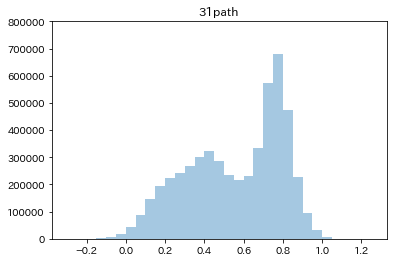

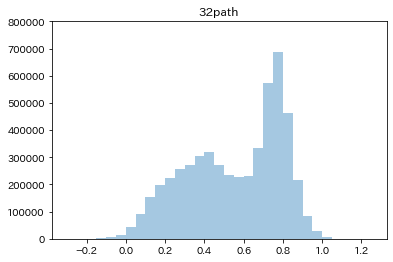

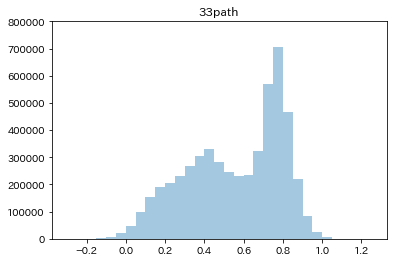

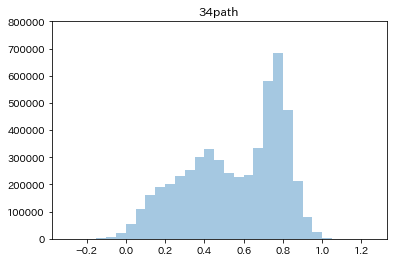

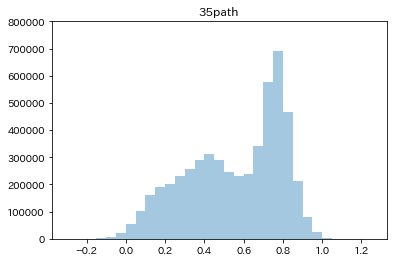

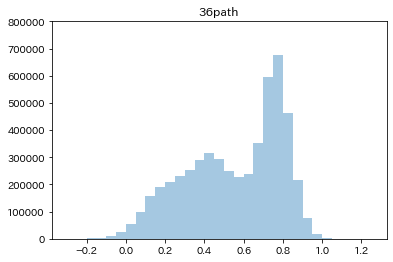

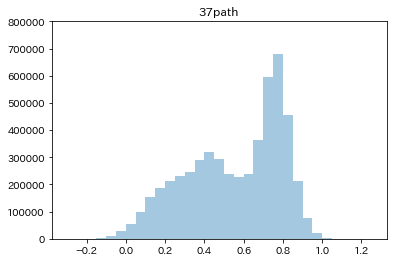

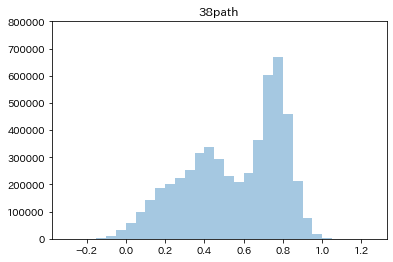

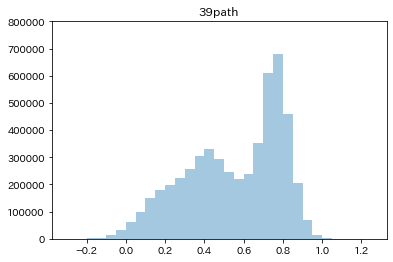

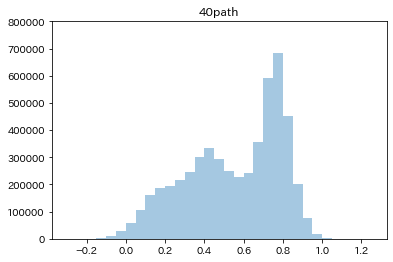

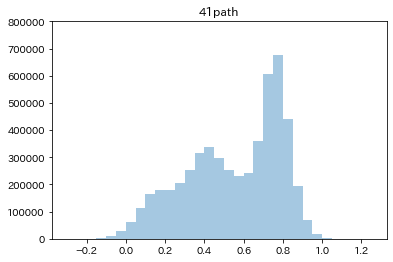

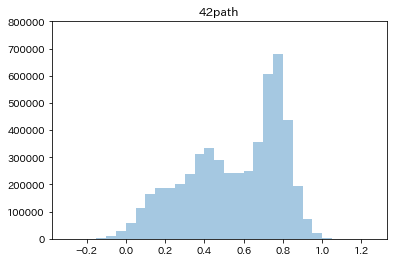

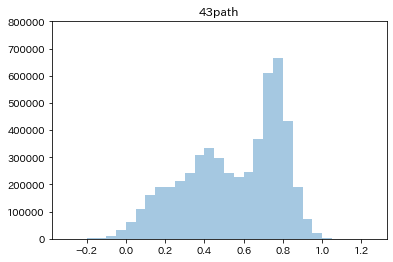

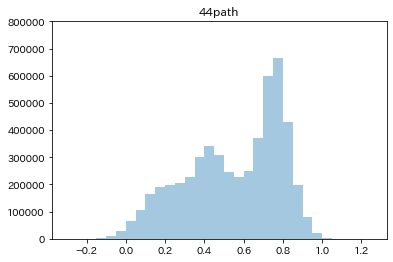

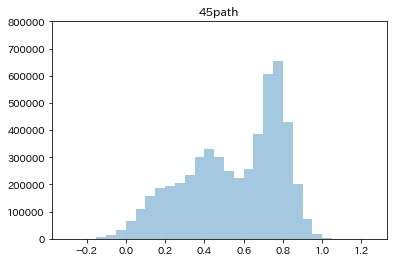

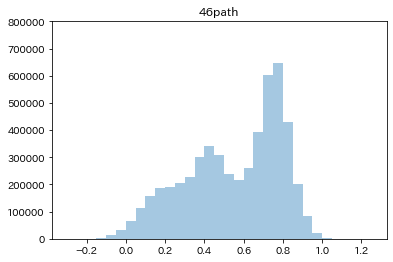

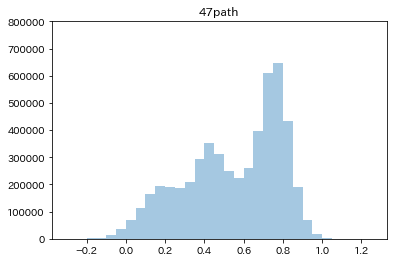

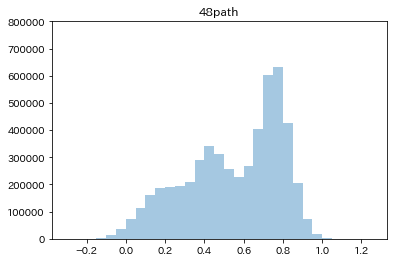

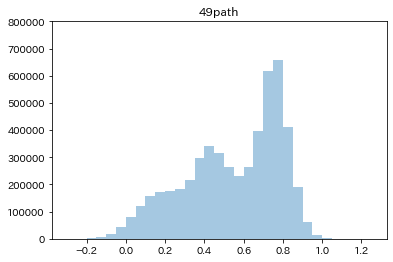

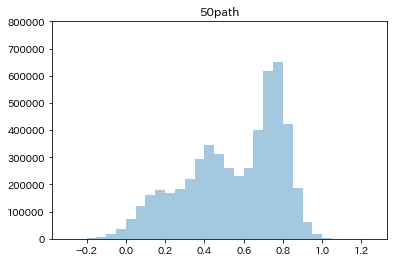

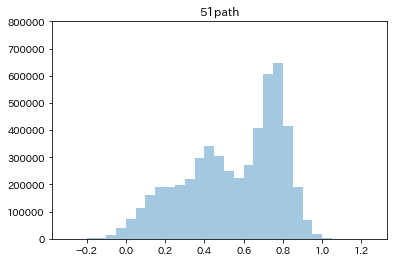

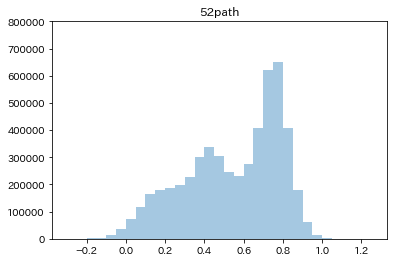

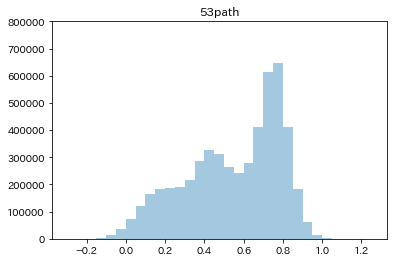

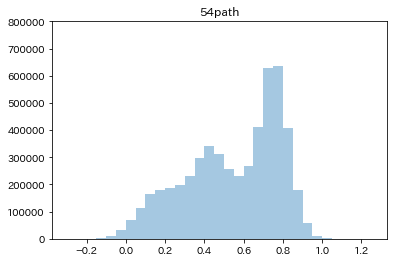

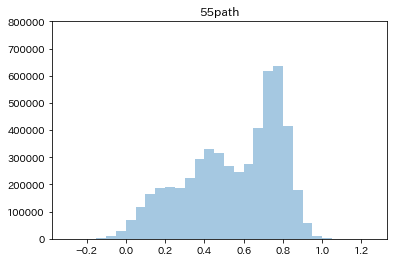

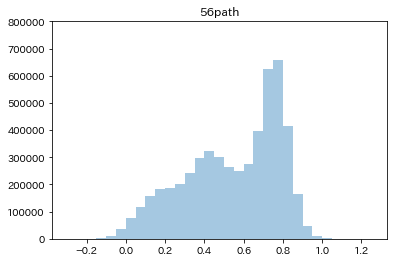

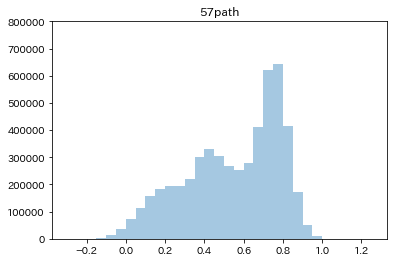

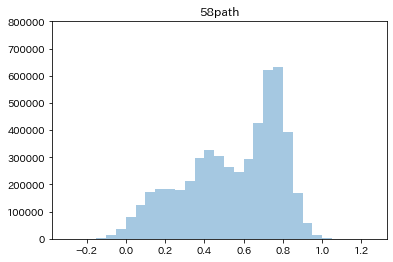

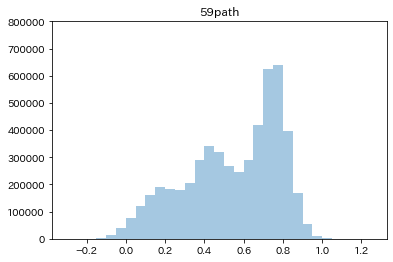

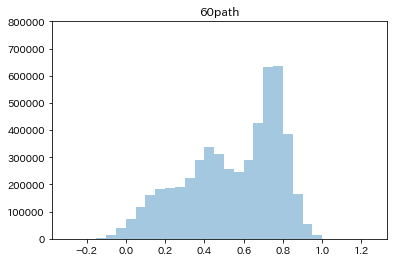

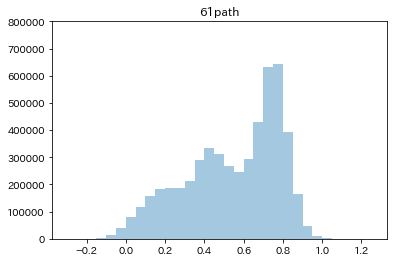

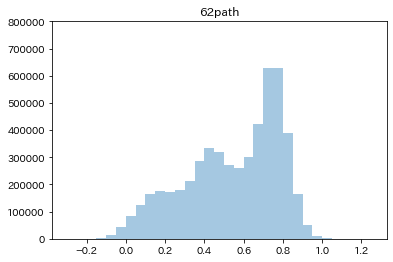

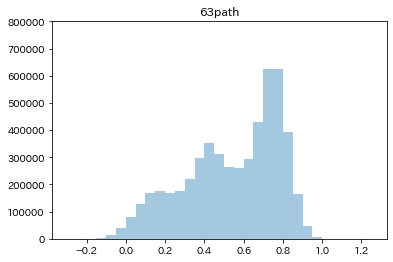

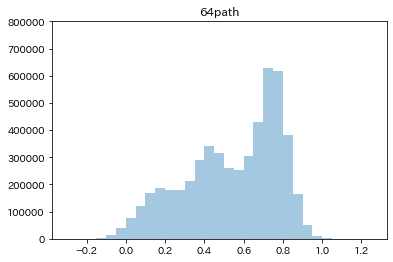

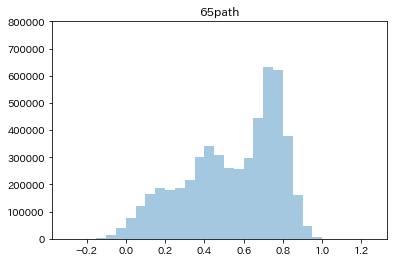

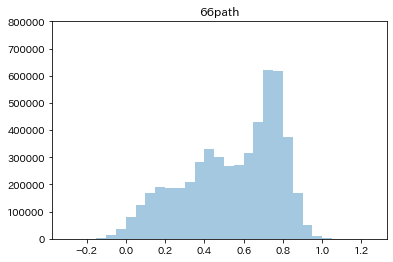

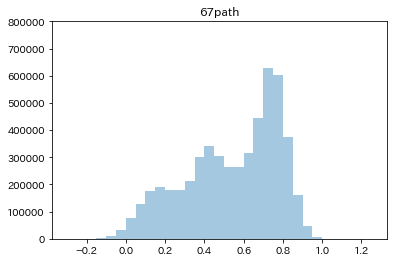

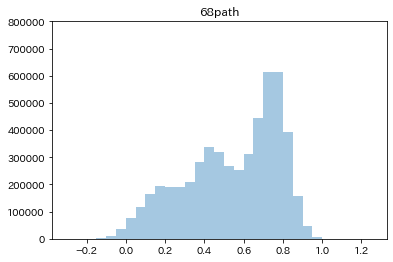

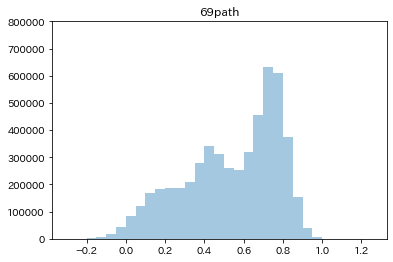

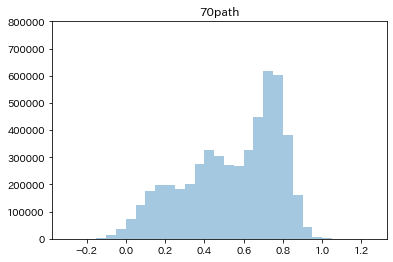

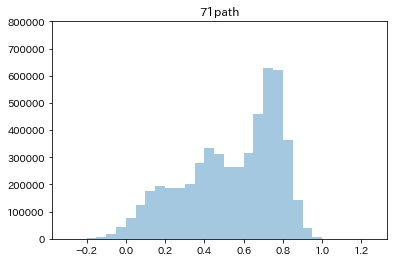

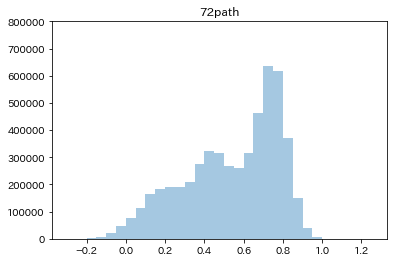

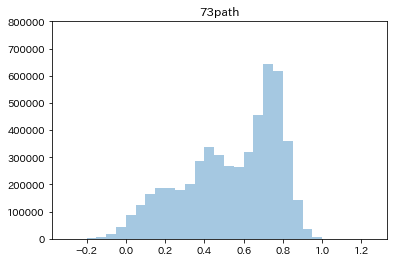

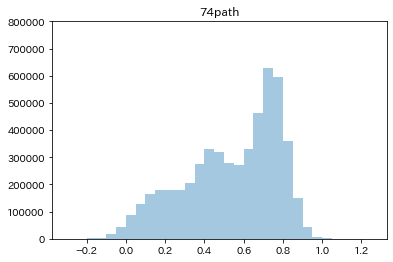

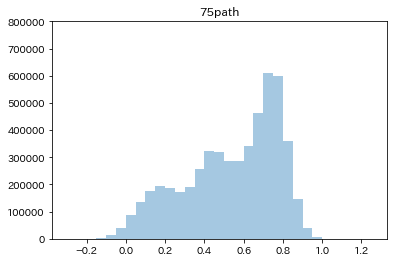

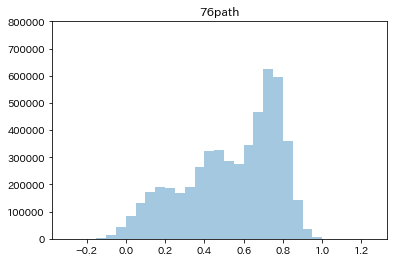

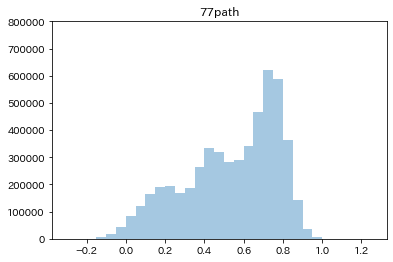

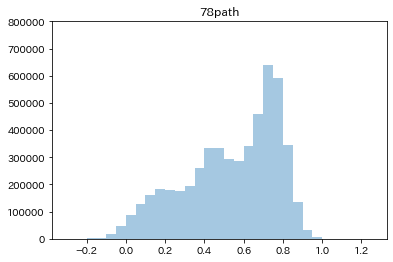

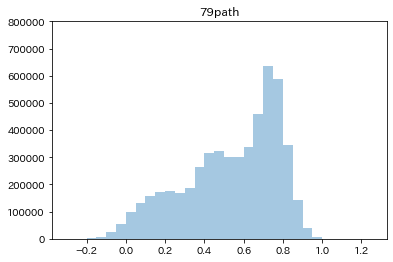

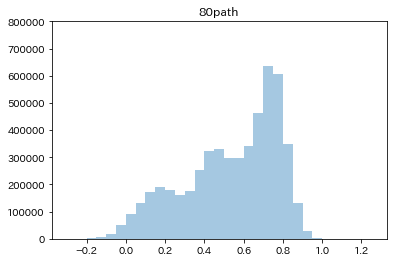

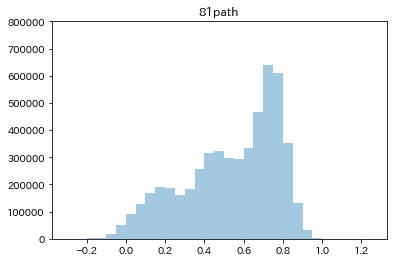

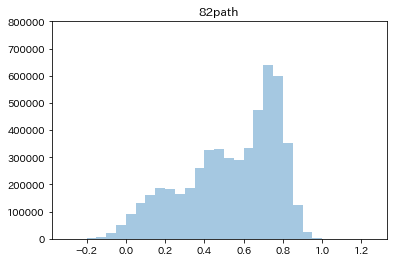

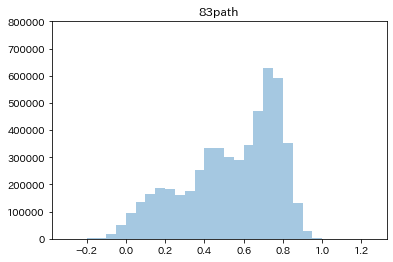

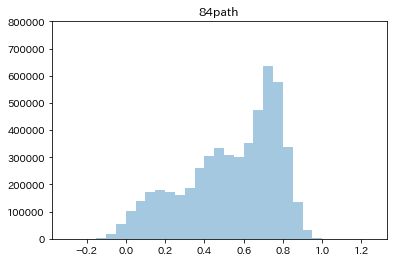

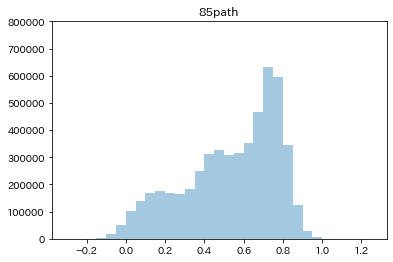

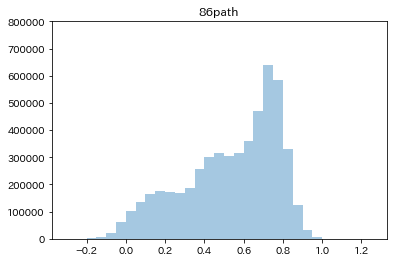

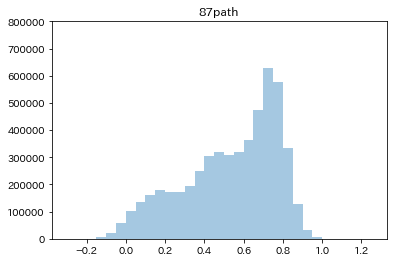

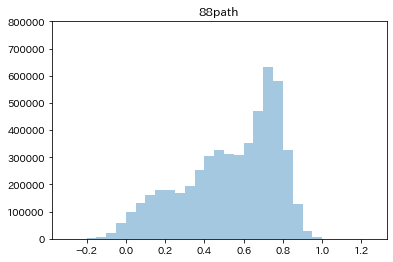

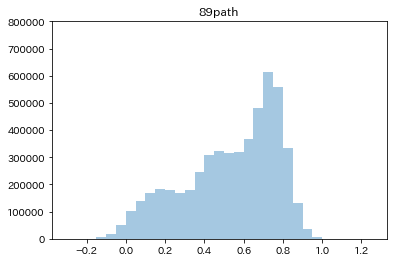

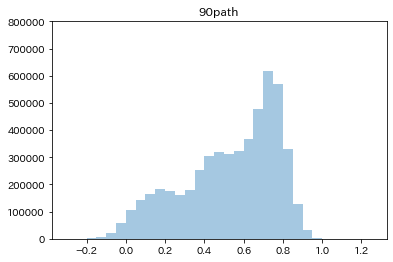

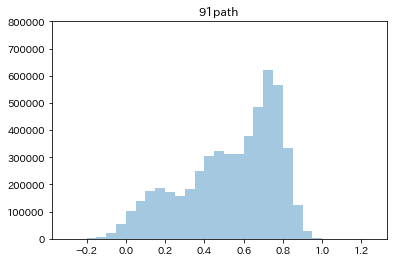

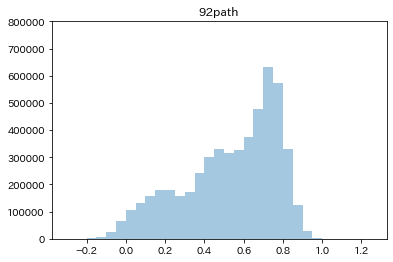

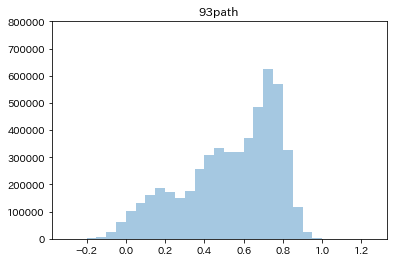

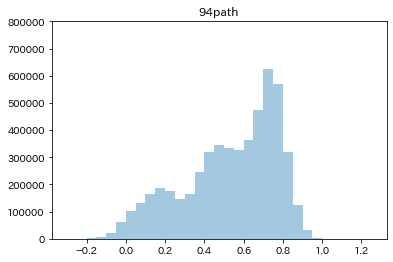

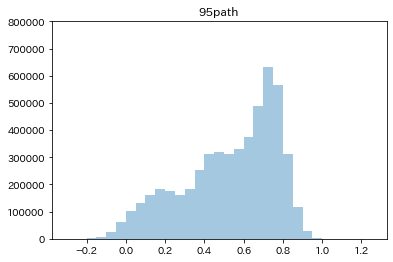

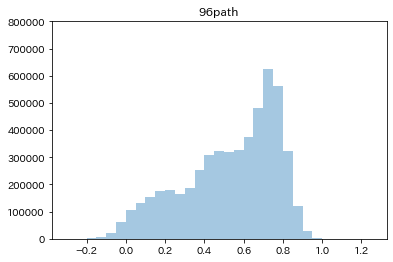

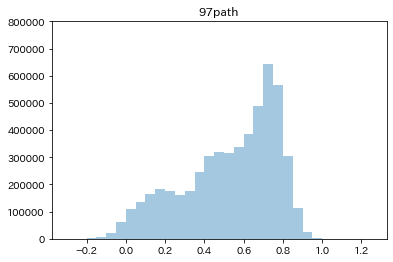

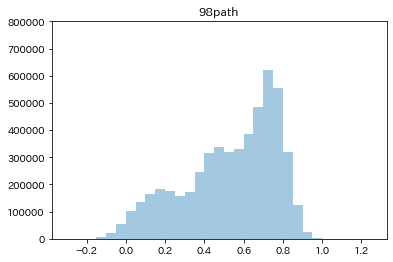

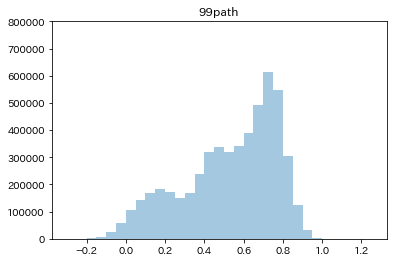

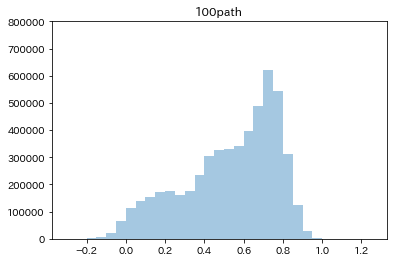

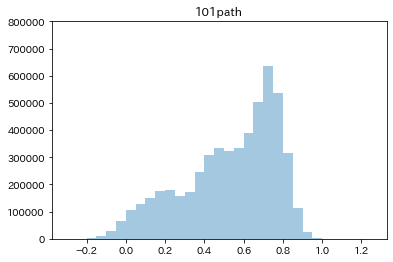

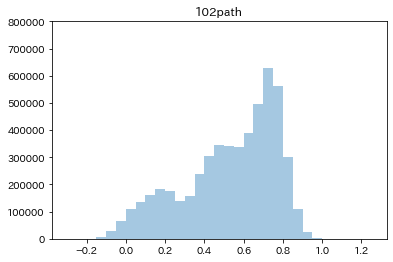

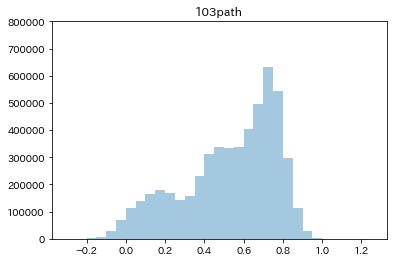

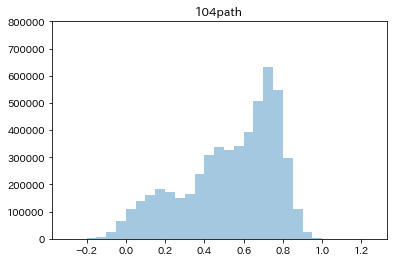

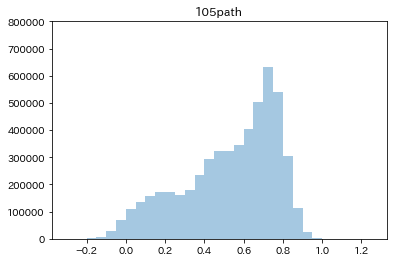

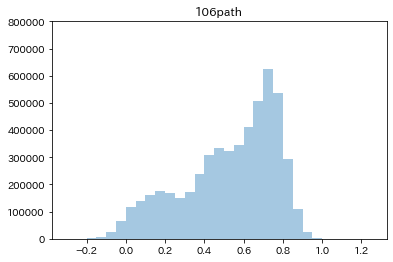

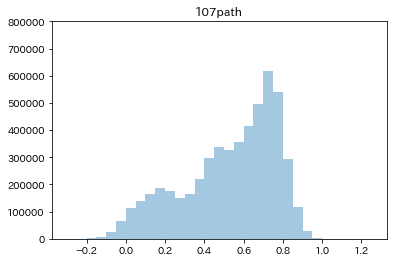

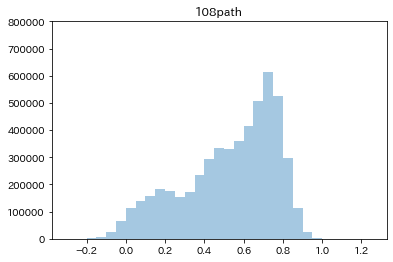

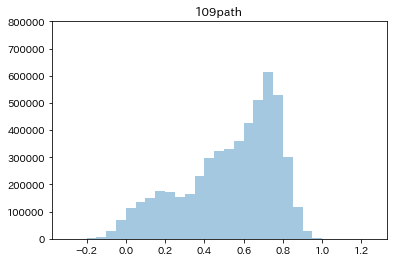

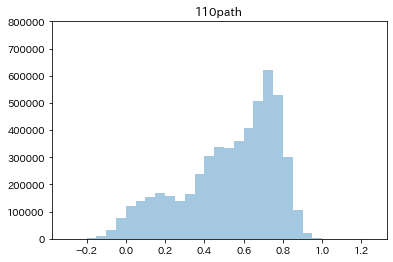

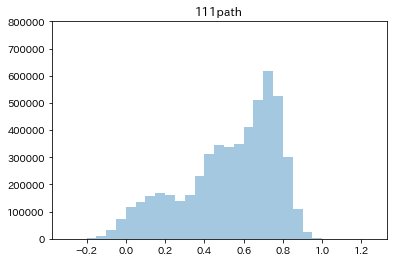

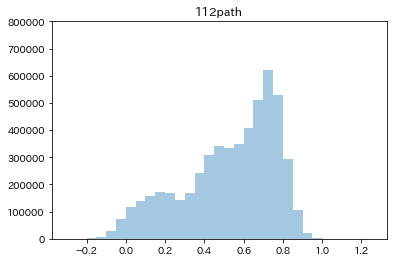

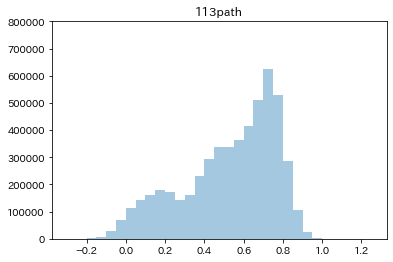

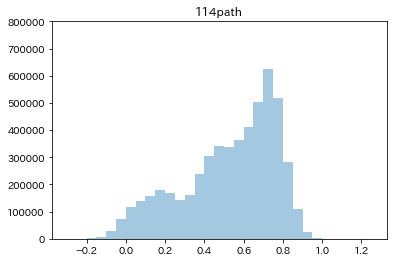

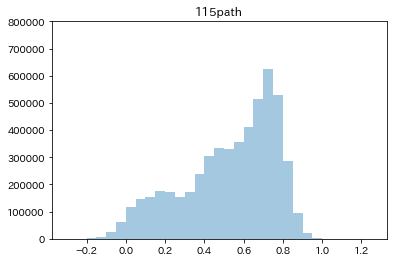

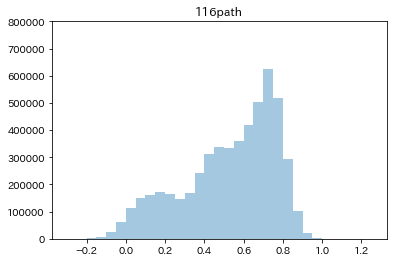

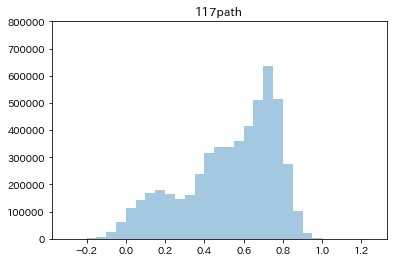

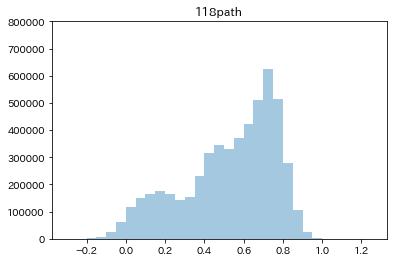

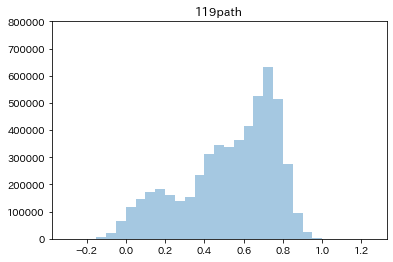

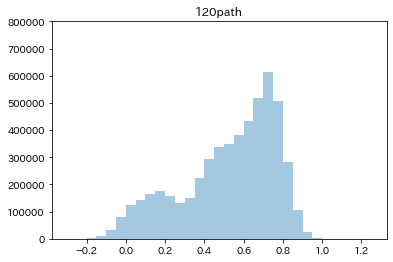

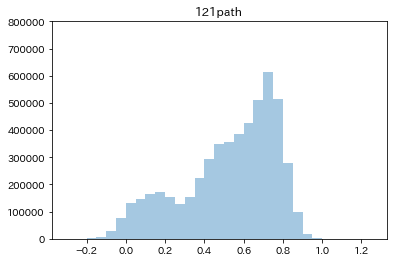

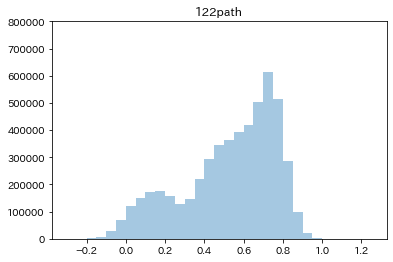

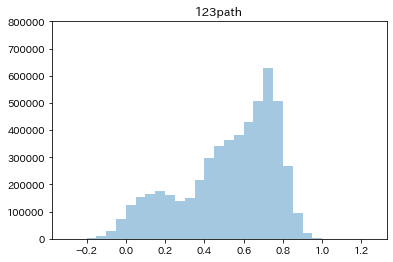

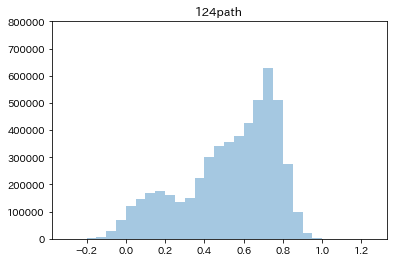

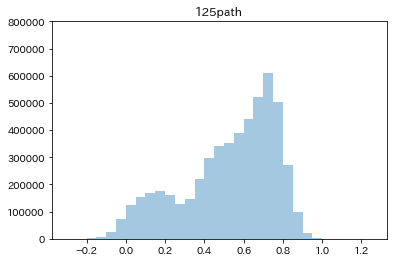

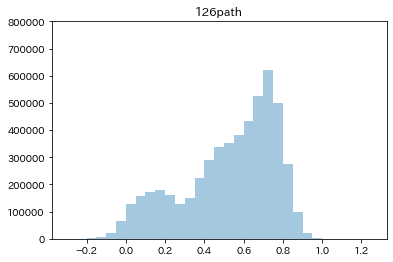

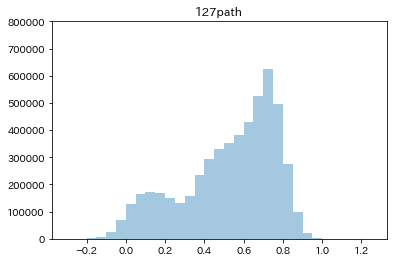

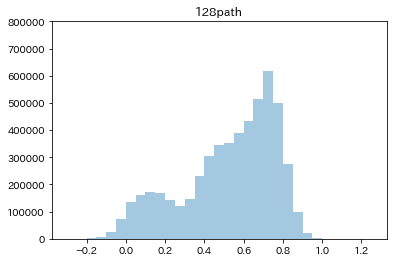

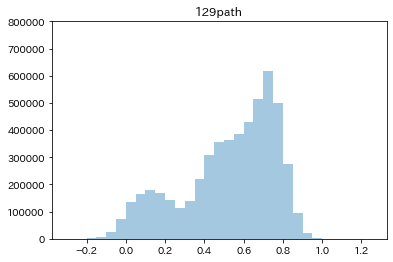

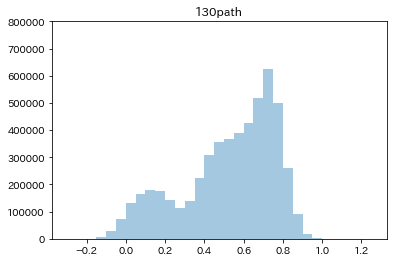

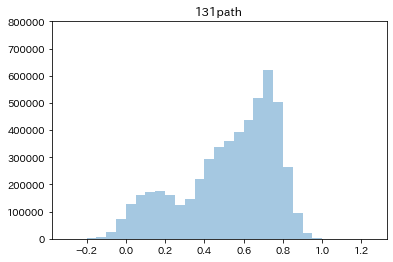

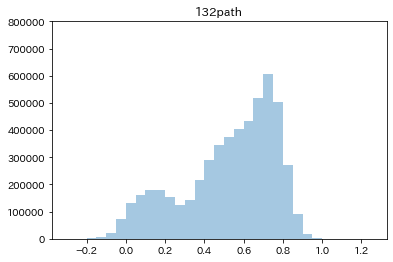

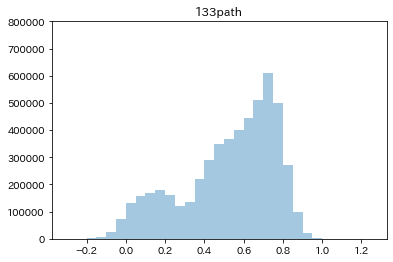

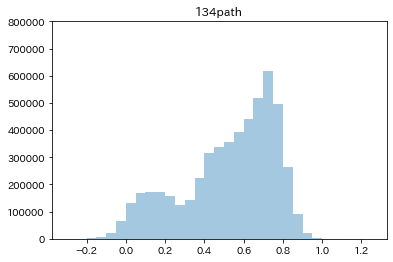

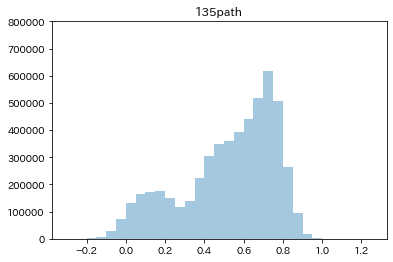

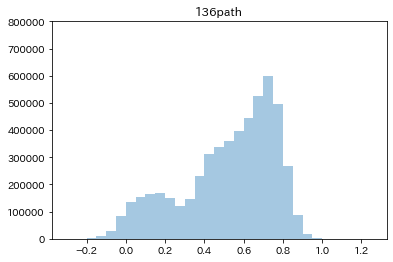

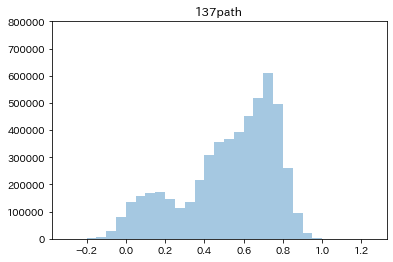

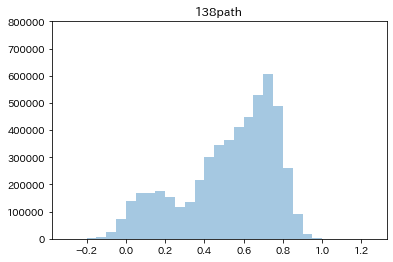

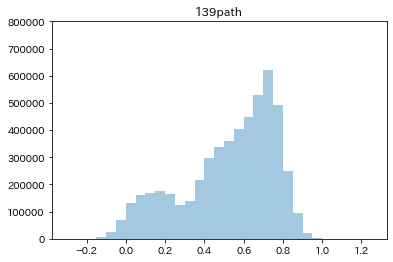

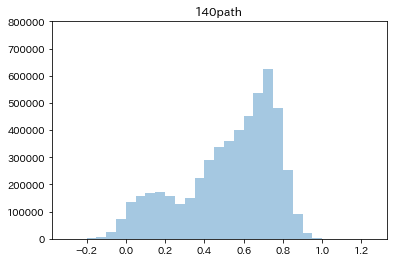

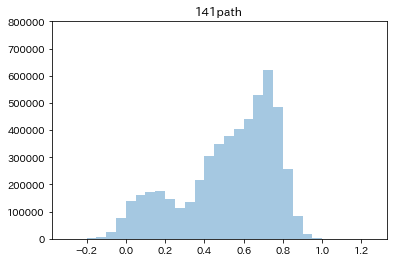

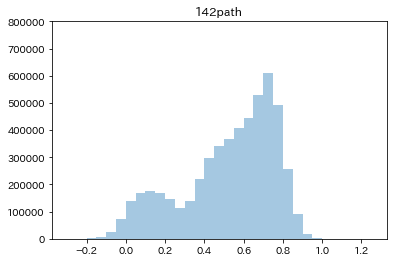

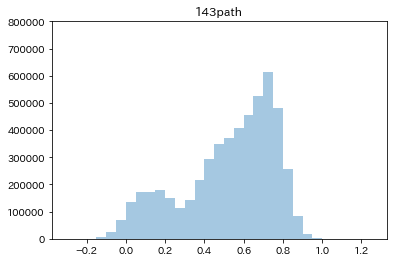

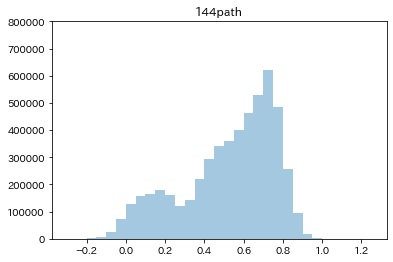

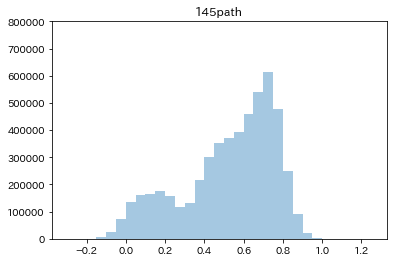

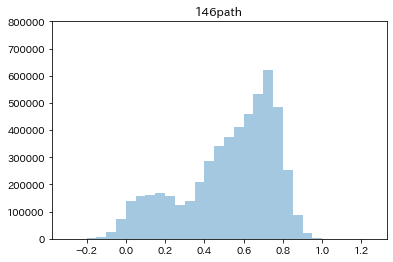

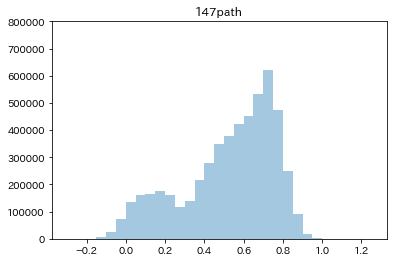

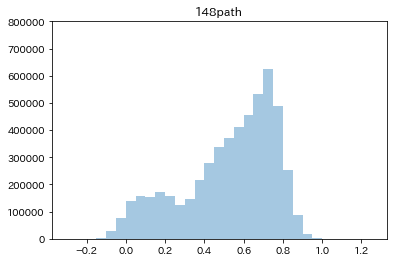

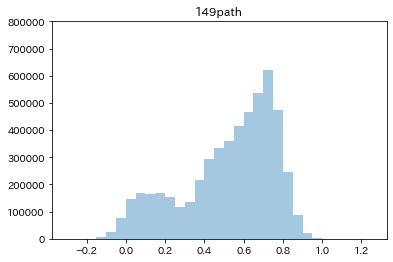

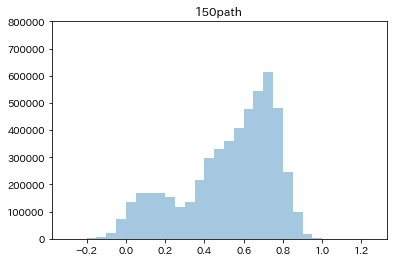

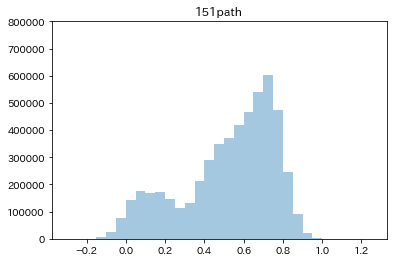

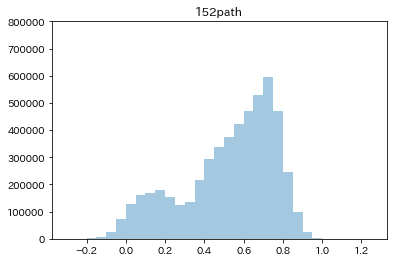

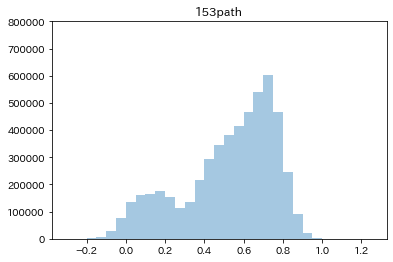

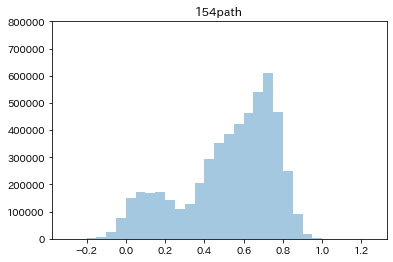

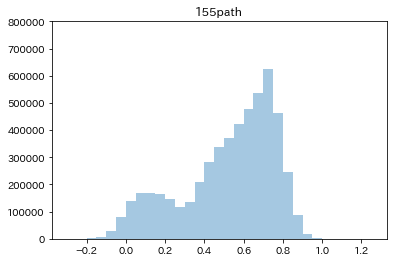

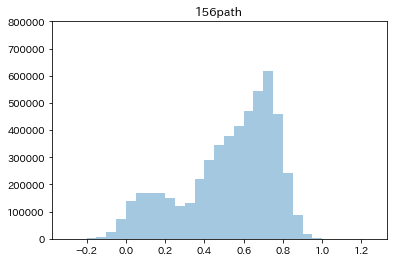

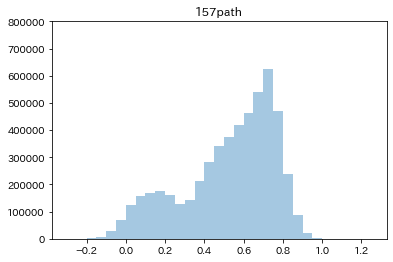

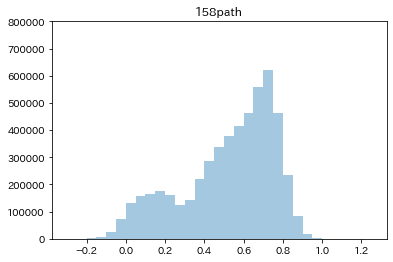

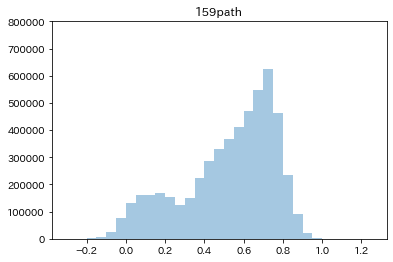

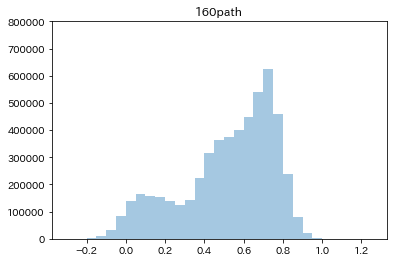

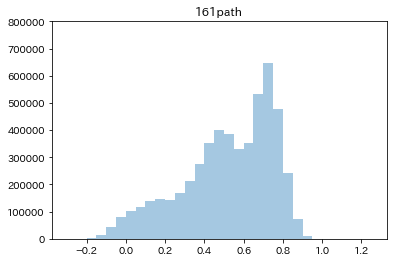

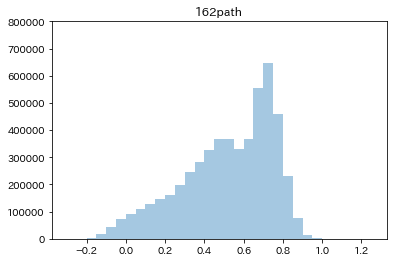

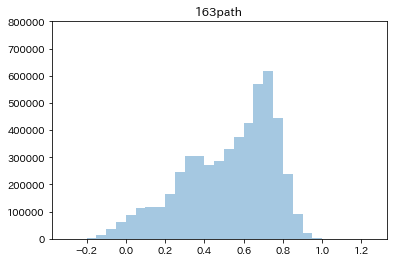

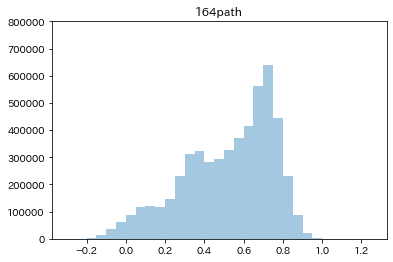

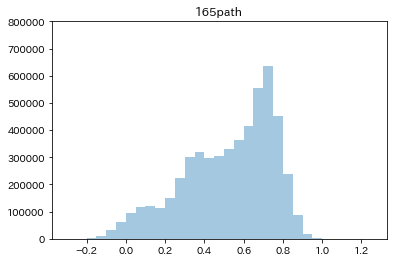

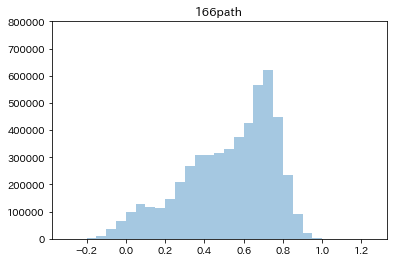

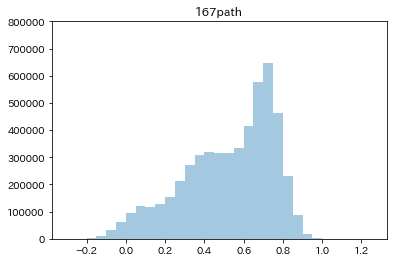

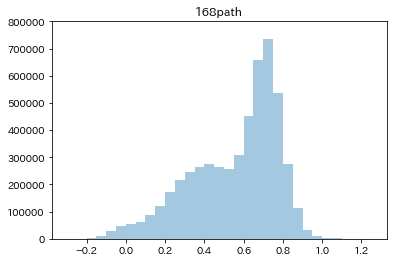

In [117]:
%matplotlib inline
num_list = np.arange(1,169)

x_min = -0.3
x_max = 1.3
range_bin_width = np.arange(x_min, x_max,0.05)

for num in tqdm(num_list):
    figure, ax = plt.subplots()
    path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
    c_d = load_tdms(path, ch_num=3)

    hist_p = sns.distplot(c_d[1], bins=range_bin_width, kde=False, rug=False)
    figure = hist_p.get_figure()
    hist_p.set_title(rf"{num}path")
    ax.set_ylim(0, 800000)
    figure.savefig(rf"C:\Users\pmg07\M2\acoustic-emission-endmilling\test\fig\a\{num}.png")

100%|██████████| 7/7 [00:05<00:00,  1.20it/s]


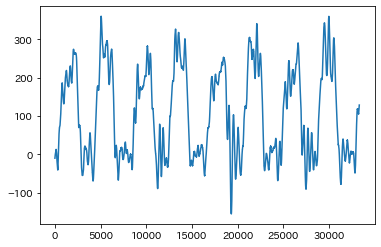

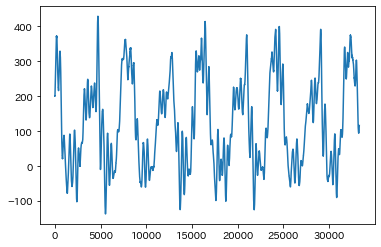

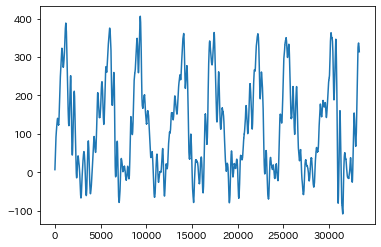

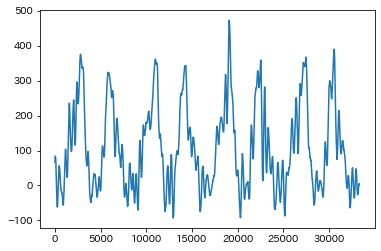

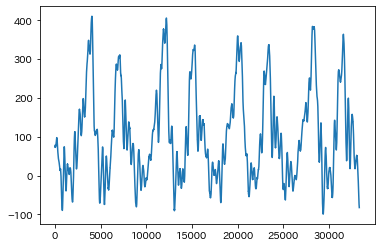

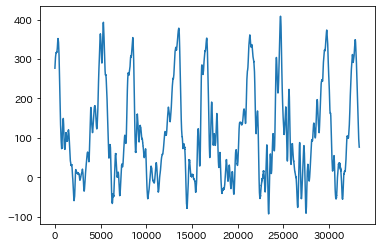

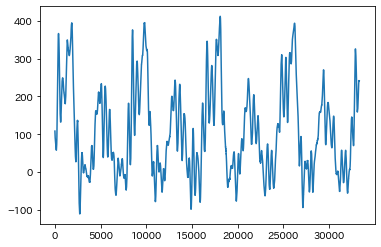

In [122]:
%matplotlib inline
# num_list = np.arange(1,169)
num_list = [1,10,50,100,150,160,166]

x_min = -0.3
x_max = 1.3
range_bin_width = np.arange(x_min, x_max,0.05)

for num in tqdm(num_list):
    figure, ax = plt.subplots()
    path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
    npath = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Non-Cutting\Dynamo_{num}.tdms"
    cd = load_tdms(path, ch_num=3)
    ncd = load_tdms(npath, ch_num=3)
    
    cd = cd[1][3000000:3000000+33333]
    ncd = ncd[1]
    
    plt.plot((cd - np.average(ncd))*-500)
    
    figure.savefig(rf"C:\Users\pmg07\M2\acoustic-emission-endmilling\test\fig\c\{num}.png")

In [60]:
%matplotlib qt
plt.figure()
# plt.plot(c_d[1][3000000:3000000+333333])
plt.plot(c_d[1])

In [89]:
path = rf"Z:\100 Raw_data\20211106---切削動力計ドリフト量調査実験_y軸正\Dynamometer\1-5000\Dynamometer_16.tdms"
c_d = load_tdms(path, ch_num=3)

In [90]:
plt.plot(c_d[1])

# 切削抵抗計算＆移動平均plotの型

In [3]:
def get_min_drift(num):
    date = 20220630
    path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Cutting\Dynamo_{num}.tdms"
    nc_path = rf"Z:\100 Raw_data\{date}---切削実験\Dynamometer\Non-Cutting\Dynamo_{num}.tdms"
    cd = load_tdms(path, ch_num=3)
    ncd = load_tdms(nc_path, ch_num=3)
    
    cd = np.array(cd[1][:4930000])
    ncd = np.array(ncd[1]) 

    cf = ( cd - np.average(ncd) ) * (-500)
    
    np.save(rf"Z:\200 Produced_data\20220630\CF\20230111_new\{num}",cf)
    return

In [4]:
%%time
list(map(get_min_drift, tqdm(np.arange(1,736))))

  6%|▌         | 42/735 [01:00<16:39,  1.44s/it]


KeyboardInterrupt: 

In [13]:
d = np.load(rf"Z:\200 Produced_data\20221027\CF\20230110_new\163.npy")
len(d)

4930000

In [141]:
d1 = np.load(rf"Z:\200 Produced_data\20221027\CF\20230110_new\1.npy")

for num in tqdm(range(2,169)):
    d2 = np.load(rf"Z:\200 Produced_data\20221027\CF\20230110_new\{num}.npy")
    d1 = np.concatenate([d1, d2], axis=0)

np.save(rf"Z:\200 Produced_data\20221027\CF\20230110_new\All",d1)

100%|██████████| 167/167 [03:05<00:00,  1.11s/it]


In [143]:
all_d = np.load(rf"Z:\200 Produced_data\20221027\CF\20230110_new\All.npy")

In [ ]:
%matplotlib qt
fig = plt.figure(figsize=(11.69*0.9,8.27*0.9), dpi=100)
ax = fig.add_subplot()
ax.set_xticks(np.arange(0, 168*4930000, 4930000*5))
ax.set_xticklabels(np.arange(0,170,5))
ax.set_xlabel(xlabel='Path Number', size=18, labelpad=18)
ax.set_ylabel(ylabel='Cutting Force[N]', size=18, labelpad=18)
ax.tick_params(axis = 'x', labelsize = 18)
ax.tick_params(axis = 'y', labelsize = 18)
ax.grid()

w_size = 4930000*10
x = np.linspace(-1,1,w_size)
v = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)
v = v / np.sum(v)
v = np.sort(v)[::-1]


cf_moving_avg = np.convolve(all_d,v, mode='valid')
print(len(cf_moving_avg))

# ax.plot(cf_all, lineWidth="1", color="blue", label="Cutting Force")
ax.plot(cf_moving_avg, lineWidth="2", color="red", label="Cutting Force")



In [14]:
%matplotlib qt

plt.plot(d[10000:10000+33333])

In [31]:
def get_min_drift(num, interval, CALC, START, INTERVAL):
    d = np.load(rf"Z:\200 Produced_data\20221027\CF\20230110_new\{num}.npy")
    cf_max = []
#     print(int(len(d)/ interval))
    for rev in range(0,int(len(d)/ interval)):
        start = rev*interval
        end = start + interval
        cf_max.append(np.max(d[start:end]))
    cf_max = np.array(cf_max)
    np.save(rf"Z:\200 Produced_data\20221027\CF\20230110_new\a\{CALC}_{START}_{INTERVAL}{interval}_{num}",cf_max)

In [33]:
interval = 4069*2
CALC = "MAX"
START = "None"
INTERVAL = "Variable"


for i in tqdm(range(1,169)):
    get_min_drift(i, interval, CALC, START, INTERVAL)

100%|██████████| 168/168 [00:36<00:00,  4.63it/s]


In [34]:
d1 = np.load(rf"Z:\200 Produced_data\20221027\CF\20230110_new\a\MAX_None_Variable8138_1.npy")

for num in tqdm(range(2,169)):
    d2 = np.load(rf"Z:\200 Produced_data\20221027\CF\20230110_new\a\MAX_None_Variable8138_{num}.npy")
    d1 = np.concatenate([d1, d2], axis=0)

np.save(rf"Z:\200 Produced_data\20221027\CF\20230110_new\a\MAX_None_Variable8138_All",d1)

100%|██████████| 167/167 [00:00<00:00, 179.38it/s]


In [134]:
cf_all = np.load(rf"Z:\200 Produced_data\20221027\CF\20230110_new\a\MAX_None_Variable8138_All.npy")
len(cf_all)/168
plt.plot(cf_all)

In [140]:
%matplotlib qt
fig = plt.figure(figsize=(11.69*0.9,8.27*0.9), dpi=100)
ax = fig.add_subplot()
ax.set_xticks(np.arange(0, 168*605, 605*5))
ax.set_xticklabels(np.arange(0,170,5))
ax.set_xlabel(xlabel='Path Number', size=18, labelpad=18)
ax.set_ylabel(ylabel='Cutting Force[N]', size=18, labelpad=18)
ax.tick_params(axis = 'x', labelsize = 18)
ax.tick_params(axis = 'y', labelsize = 18)
ax.grid()

w_size = 605*10
x = np.linspace(-1,1,w_size)
v = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)
v = v / np.sum(v)
v = np.sort(v)[::-1]


cf_moving_avg = np.convolve(cf_all,v, mode='valid')
print(len(cf_moving_avg))

# ax.plot(cf_all, lineWidth="1", color="blue", label="Cutting Force")
ax.plot(cf_moving_avg, lineWidth="5", color="red", label="Cutting Force")


95591


In [131]:
l = cf_all <400
cf_all[np.where(l)[0]] = np.average(cf_all)
plt.plot(cf_all)

In [109]:
a = np.array([1,2,521,1,1,1,1,2])
l = a<2
g = a>=2
print(np.average(a))
print(np.average(a[np.where(g)[0]]))
# a[np.where(l)[0]] = np.average(a[np.where(g)[0]])
a[np.where(l)[0]] = 66

a

66.25
175.0


array([ 66,   2, 521,  66,  66,  66,  66,   2])

In [96]:
a = np.array([1,2,2,2,2,1,1,1,2])
# np.average(a, axis=1)
b = np.average(a)
l = a<2
print(l)
print(a[np.where(l)[0]])
a[np.where(l)[0]] = b
# a[np.where(a<2)[0]] = np.average(a)
a
# l = (a<2)
# g = (a>=2)


# a[np.where(l)[0]] = np.average(a[np.where(g)[0]])

# a[np.where(l)[0]] 

[ True False False False False  True  True  True False]
[1 1 1 1]


array([1, 2, 2, 2, 2, 1, 1, 1, 2])

In [126]:
indices = cf_all < 300
cf_all[np.where(indices)[0]]

array([], dtype=float32)

In [114]:
np.count_nonzero(cf_all < 350) / len(cf_all) *100

0.0

In [33]:
indices = cf_all < 300
pos = np.where(indices)[0] / 605
plt.plot(pos, lineStyle="dotted")

In [32]:
%matplotlib qt
plt.plot(cf_all)

In [133]:
%matplotlib qt
fig = plt.figure(figsize=(11.69*0.9,8.27*0.9), dpi=100)
ax = fig.add_subplot()
ax.set_xticks(np.arange(0, 168*605, 605*10))
ax.set_xticklabels(np.arange(0,169,10))
ax.set_xlabel(xlabel='Path Number', size=18, labelpad=18)
ax.set_ylabel(ylabel='Cutting Force[N]', size=18, labelpad=18)
ax.tick_params(axis = 'x', labelsize = 18)
ax.tick_params(axis = 'y', labelsize = 18)
ax.grid()

w_size = 605*10
x = np.linspace(-1,1,w_size)
v = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)
v = v / np.sum(v)
v = np.sort(v)[::-1]


cf_moving_avg = np.convolve(cf_all,v, mode='valid')
print(len(cf_moving_avg))

# ax.plot(cf_all, lineWidth="1", color="blue", label="Cutting Force")
ax.plot(cf_moving_avg, lineWidth="5", color="red", label="Cutting Force")


95591
